# Exploratory Analysis of the Data

> Written by Marta Galván

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import scipy.stats as ss
import statistics as stats
import seaborn as sns 
from pandas.plotting import autocorrelation_plot

## Visualization of the data

We upload the csv first of all, eliminating the columns **'Unnamed: 0'** and **estatus_glucemico**, since they are the ones used for defying the feature variable. Later we print the total shape of the the csv and the names of the final columns present in the data.

In [2]:
data = pd.read_csv("pacientes_progresores_2021.csv")
patient_data= data.drop(['Unnamed: 0','estatus_glucemico_inicio','estatus_glucemico_final'], axis=1) 
print(patient_data.shape)

(2016, 24)


In [3]:
patient_data.columns
columns = list(patient_data.columns)
#columns


In [4]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sexo              2016 non-null   object 
 1   edad              2016 non-null   int64  
 2   peso              2016 non-null   float64
 3   talla             2016 non-null   int64  
 4   IMC               2016 non-null   float64
 5   TAS               2016 non-null   int64  
 6   TAD               2016 non-null   int64  
 7   LDL               1983 non-null   float64
 8   HDL               1993 non-null   float64
 9   trigl             2012 non-null   float64
 10  Hbglic            1725 non-null   float64
 11  albuminuria       1925 non-null   float64
 12  creat             2016 non-null   float64
 13  cist              2016 non-null   float64
 14  PCR               2016 non-null   float64
 15  Epi.creat         2016 non-null   float64
 16  Epi.cist          2016 non-null   float64


In [5]:
patient_data

,sexo,edad,peso,talla,IMC,TAS,TAD,LDL,HDL,trigl,...,PCR,Epi.creat,Epi.cist,diabetes,evento.cv,mortalidad,num_farmacos,hemoglobina_glic,glucemia,progresores
0,V,64,101.0,168,35.7,136,79,161.0,81.0,202.0,...,3.45,77.912391,104.784197,NO,0,0,3,5.3,96.0,progresor_prediab
1,V,50,94.0,167,33.7,138,86,134.0,57.0,161.0,...,13.10,63.621400,56.543903,NO,0,0,2,NaN,92.0,sano_no_progresor
2,M,59,96.0,157,38.9,147,68,81.0,97.0,109.0,...,3.44,94.835852,99.735909,NO,0,0,2,5.9,100.0,mejoria
3,M,47,75.0,150,33.3,141,84,199.0,78.0,612.0,...,5.50,119.731190,126.125489,NO,0,0,4,6.0,104.0,prediab_no_progresor
4,V,62,87.0,176,28.0,123,81,152.0,41.0,301.0,...,10.70,60.331459,98.543859,SI,0,0,1,6.5,156.0,diabetico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,V,58,80.0,165,29.3,155,78,160.0,56.0,158.0,...,4.04,98.468928,112.675956,SI,0,0,4,8.6,204.0,diabetico
2012,M,70,75.0,155,31.2,145,72,100.0,48.0,170.0,...,6.60,93.386421,100.803927,SI,0,0,2,6.2,102.0,progresor_diab
2013,M,67,61.0,154,25.7,160,81,143.0,67.0,114.0,...,11.60,97.651100,110.267435,NO,0,0,3,5.5,91.0,sano_no_progresor
2014,V,53,114.0,169,39.9,138,88,138.0,72.0,249.0,...,5.81,84.171448,139.918535,NO,0,0,2,6.0,111.0,mejoria


## Treatment of cathegorical values.

In the case of 'diabetes' and 'sexo' we have categorical alues that need to be transformed into numbers in order to properly train the model.

In [6]:
patient_data['sexo'] = patient_data['sexo'].astype('category').cat.codes # 0 --> Mujer, 1--> Varón
patient_data['diabetes'] = patient_data['diabetes'].astype('category').cat.codes # 0 --> NO, 1--> SI

In [7]:
#patient_data

## Maximum and minimum identification

In order to see theminimum and the maximum of each variable, we use the .describe() command. 

In [8]:
patient_data.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sexo,2016,NaN,NaN,NaN,0.493056,0.500076,0,0,0,1,1
edad,2016,NaN,NaN,NaN,56.0223,13.9768,14,48,57,65,90
peso,2016,NaN,NaN,NaN,83.0075,16.8202,45,71,81,92,166
talla,2016,NaN,NaN,NaN,162.736,10.1879,136,155,162,170,195
IMC,2016,NaN,NaN,NaN,31.2646,5.5864,16.8,27.5,30.4,34,59.2
TAS,2016,NaN,NaN,NaN,141.325,13.8755,104,132,141,149,246
TAD,2016,NaN,NaN,NaN,79.7822,9.03853,53,74,80,85,124
LDL,1983,NaN,NaN,NaN,132.923,32.6768,42,111,132,153,276
HDL,1993,NaN,NaN,NaN,63.575,17.4339,6,51,61,73,168
trigl,2012,NaN,NaN,NaN,178.102,120.43,26,108.75,147.5,208,1600


In [9]:
patient_data.describe()['edad'][['min','max']]


min    14.0
max    90.0
Name: edad, dtype: float64

A list with maximum and minimum values was created, using the columns with the numeric values (the non-numeric values were deleted). Every variable's maximum, minimum and data is associated to an element in the list. 

In [10]:
max_min_list=[]
for el in columns:
    try:
        max_min_list.append(patient_data.describe()[el][['min','max']])
    except:
        print('Para evitar el problema con progresores')

Para evitar el problema con progresores


In [11]:
max_min_list[1]


min    14.0
max    90.0
Name: edad, dtype: float64

## Outliers identification using boxplots. 

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Boxplot will be used in order to identify them. 

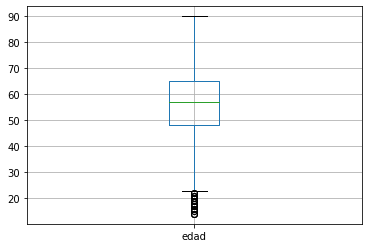

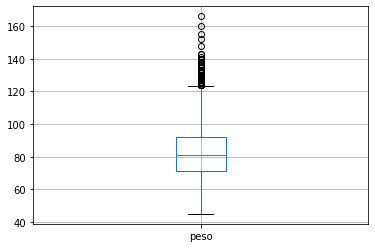

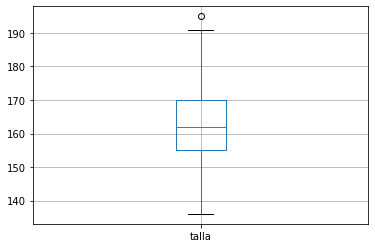

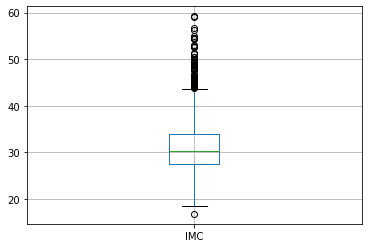

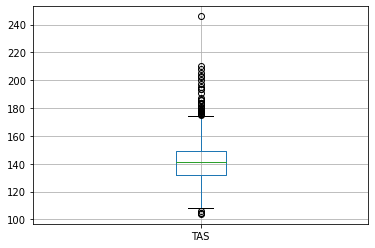

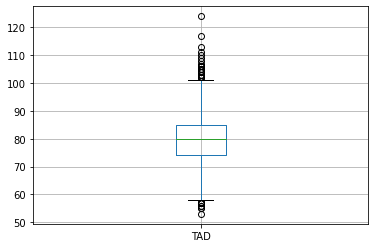

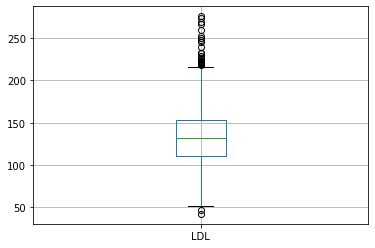

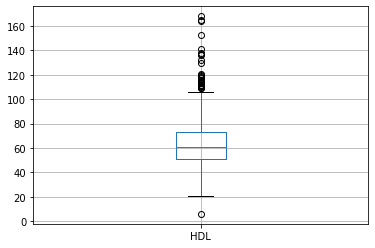

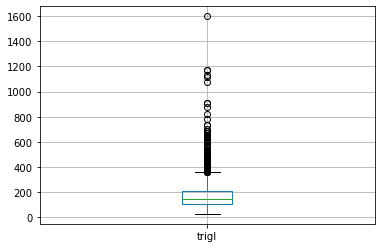

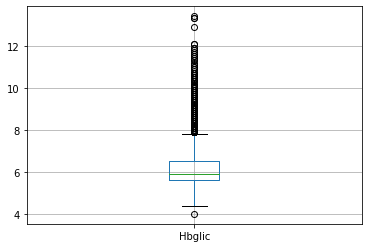

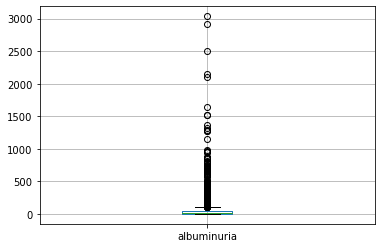

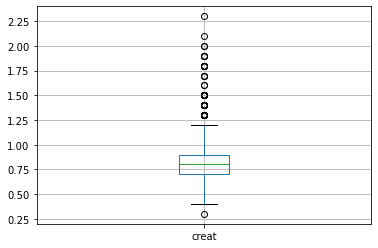

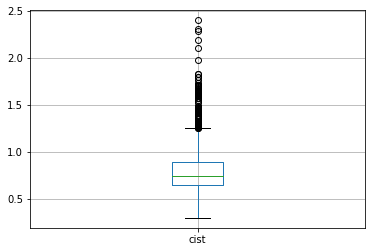

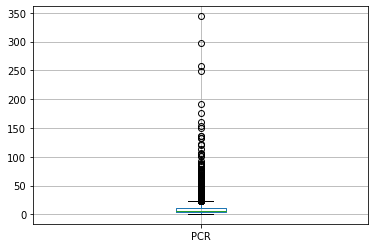

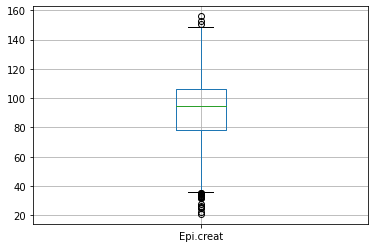

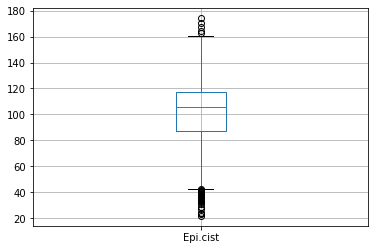

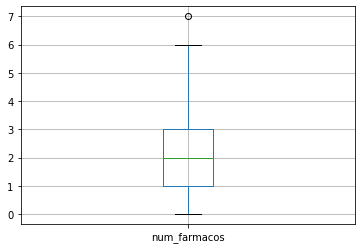

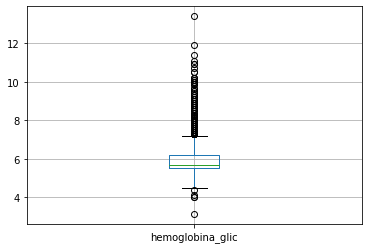

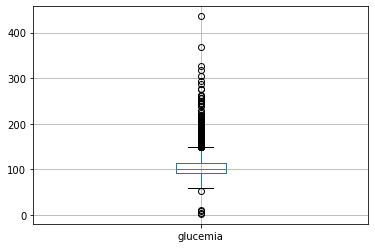

In [12]:

for i in columns:
    if i == 'mortalidad' or i=='evento.cv' or i=='sexo' or i=='diabetes' or i=='progresores': #eliminamos los dos boxplots de las variabes binarias
        continue
    else:
        patient_data.boxplot(column=i)
        plt.show()
    

The binary variables are: 'evento.cv' and 'mortalidad'. This values only give 0 or 1.

* The maximum and minimum for **age** given by the data are **[90,14]**. According to the boxplot, the maximum would be the same, but the minimum should be around 22. Any number below is an outliner. 

* The maximum and minimum for **weight** given by the data are **[166,45]**. According to the boxplot, the maximum would be 121, and the minimum should be around 45,as well. Any number outside the values is an outliner. 

* The maximum and minimum for **size** given by the data are **[195,136]**. According to the boxplot, the maximum would be 191, and the minimum should be around 136,as well. Any number outside the values is an outliner.

* The maximum and minimum for **IMC** given by the data are **[59.2,16.8]**. According to the boxplot, the maximum would be 43, and the minimum should be around 16.8,as well. Any number outside the values is an outliner.

* The maximum and minimum for **TAS** given by the data are **[246,104]**. According to the boxplot, the maximum would be around 175, and the minimum should be around 110. Any number outside the values is an outliner.

* The maximum and minimum for **TAD** given by the data are **[124,53]**. According to the boxplot, the maximum would be around 102, and the minimum should be around 58. Any number outside the values is an outliner.

* The maximum and minimum for **LDL** given by the data are **[276,42]**. According to the boxplot, the maximum would be around 220, and the minimum should be around 50. Any number outside the values is an outliner.

* The maximum and minimum for **HDL** given by the data are **[168,6]**. According to the boxplot, the maximum would be around 107, and the minimum should be around 20. Any number outside the values is an outliner.

* The maximum and minimum for **triglicerides** given by the data are **[1600,26]**. According to the boxplot, the maximum would be around 380, and the minimum should be around 26. Any number outside the values is an outliner.

* The maximum and minimum for **Hbglic** given by the data are **[13.4,4]**. According to the boxplot, the maximum would be around 7.8, and the minimum should be around 4.5. Any number outside the values is an outliner.

* The maximum and minimum for **albuminuria** given by the data are **[3037,0]**. According to the boxplot, the maximum would be around 110, and the minimum should be around 0. Any number outside the values is an outliner.

* The maximum and minimum for **creat** given by the data are **[2.3,0.3]**. According to the boxplot, the maximum would be around 0.4, and the minimum should be around 1.23. Any number outside the values is an outliner.

* The maximum and minimum for **cist** given by the data are **[2.4,0.3]**. According to the boxplot, the maximum would be around 0.6, and the minimum should be around 1.25. Any number outside the values is an outliner.

* The maximum and minimum for **PCR** given by the data are **[344,0.8]**. According to the boxplot, the maximum would be around 25, and the minimum should be around 0.8. Any number outside the values is an outliner.

* The maximum and minimum for **EPI.creat** given by the data are **[155.99,20.93]**. According to the boxplot, the maximum would be around 150, and the minimum should be around 38. Any number outside the values is an outliner.

* The maximum and minimum for **EPI.cist** given by the data are **[174.18,21.65]**. According to the boxplot, the maximum would be around 160, and the minimum should be around 41. Any number outside the values is an outliner.

* The maximum and minimum for **EPI.cist** given by the data are **[174.18,21.65]**. According to the boxplot, the maximum would be around 160, and the minimum should be around 41. Any number outside the values is an outliner.

* In the case of **evento.cv**, **mortalidad**, **diabetes** and **sexo** the boxplots are not useful, since the value can be either 1 or 0.

* The maximum and minimum for **num_farmacos** given by the data are **[7,0]**. According to the boxplot, the maximum would be around 6, and the minimum should be around 0. Any number outside the values is an outliner.

* The maximum and minimum for **hemoglobina_glic** given by the data are **[13.4,3.13]**. According to the boxplot, the maximum would be around 7.2, and the minimum should be around 5. Any number outside the values is an outliner.

* The maximum and minimum for **glucemia** given by the data are **[436,2]**. According to the boxplot, the maximum would be around 150, and the minimum should be around 50. Any number outside the values is an outliner.

## Comparison of Hbglic and hemoglobina_glic

I will represent both in order to see the distribution of the different values through the csv.

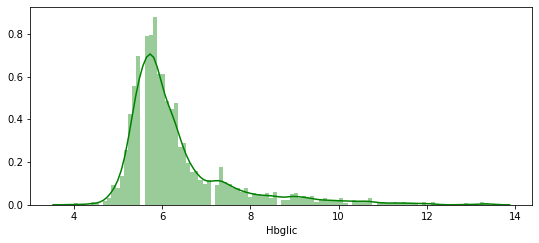

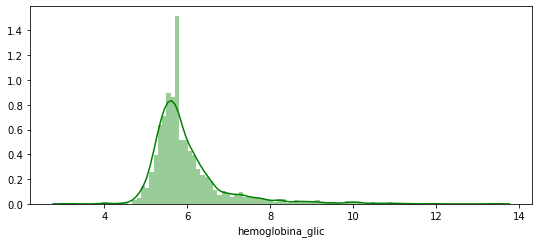

In [13]:
#print(patient_data['Hbglic'].describe())

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
sns.distplot(patient_data['Hbglic'], color='g', bins=100, hist_kws={'alpha': 0.4});

#print(patient_data['hemoglobina_glic'].describe())

plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 2)
sns.distplot(patient_data['hemoglobina_glic'], color='g', bins=100, hist_kws={'alpha': 0.4});

Distribution already appears to be different for each value. Let's check the values for each patient.

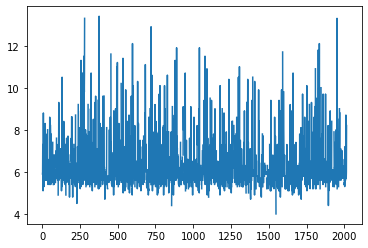

In [14]:
plt.plot(patient_data['Hbglic'])

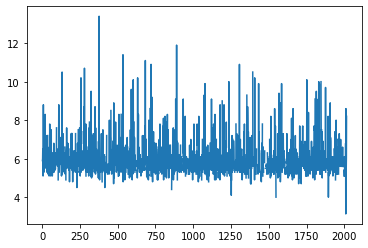

In [15]:
plt.plot(patient_data['hemoglobina_glic'])

It appears to be different in each patient. is was corroborated after a talk with the doctor. They are both considered the same. We will first do everything deleting 'Hbglic'.

In [16]:
del patient_data['Hbglic']

## Histogram for number of drugs.

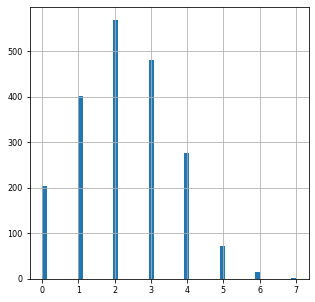

In [17]:
patient_data['num_farmacos'].hist(figsize=(5, 5), bins=50, xlabelsize=8, ylabelsize=8)

## Changing the outliers into NaN

In order to change the outlier values into **NaN** we need to apply the knowledge of the clinician that defines the values for each variable. The values obtained as. reference are obtained from a document sent by the physician. 

In [18]:
#AGE
for i in patient_data['edad']:
    if i < 20  or  i > 90:
        patient_data['edad']= patient_data['edad'].replace({i: np.nan})
        
#WEIGHT
for i in patient_data['peso']:
    if i < 50  or  i > 180:
        patient_data['peso']= patient_data['peso'].replace({i: np.nan})
        
#SIZE
for i in patient_data['talla']:  #preguntar a oscar
    if i < 120  or  i > 210:
        patient_data['talla']= patient_data['talla'].replace({i: np.nan})
        
#IMC 
for i in patient_data['IMC']:
    if i < 20  or  i > 35:
        patient_data['IMC']= patient_data['IMC'].replace({i: np.nan})
        
#TAS
for i in patient_data['TAS']:
    if i < 90  or  i > 220:
        patient_data['TAS']= patient_data['TAS'].replace({i: np.nan})
        
#TAD
for i in patient_data['TAD']:
    if i < 40  or  i > 150:
        patient_data['TAD']= patient_data['TAD'].replace({i: np.nan})
        
#LDL
for i in patient_data['LDL']:
    if i < 10  or  i > 200:
        patient_data['LDL']= patient_data['LDL'].replace({i: np.nan})
        
#HDL
for i in patient_data['HDL']:
    if i < 15  or  i > 100:
        patient_data['HDL']= patient_data['HDL'].replace({i: np.nan})

#trigl
for i in patient_data['trigl']:
    if i < 50  or  i > 750:
        patient_data['trigl']= patient_data['trigl'].replace({i: np.nan})
        
#Hbglic 
for i in patient_data['hemoglobina_glic']:
    if i < 2  or  i > 15:
        patient_data['hemoglobina_glic']= patient_data['hemoglobina_glic'].replace({i: np.nan})
        
#albuminuria 
for i in patient_data['albuminuria']:
    if i < 0  or  i > 3000:
        patient_data['albuminuria']= patient_data['albuminuria'].replace({i: np.nan})

        
#creat 
for i in patient_data['creat']:
    if i < 0.3  or  i > 4:
        patient_data['creat']= patient_data['creat'].replace({i: np.nan})
        
#cist 
for i in patient_data['cist']:
    if i < 0.3  or  i > 4:
        patient_data['cist']= patient_data['cist'].replace({i: np.nan})

        
#PCR 
for i in patient_data['PCR']:
    if i < 3  or  i > 200:
        patient_data['PCR']= patient_data['PCR'].replace({i: np.nan})

#Epi.creat 
for i in patient_data['Epi.creat']:
    if i < 15  or  i > 160:
        patient_data['Epi.creat']= patient_data['Epi.creat'].replace({i: np.nan})

#Epi.cist 
for i in patient_data['Epi.cist']:
    if i < 15  or  i > 160:
        patient_data['Epi.cist']= patient_data['Epi.cist'].replace({i: np.nan})

#glucemia 
for i in patient_data['glucemia']:
    if i < 80  or  i > 350:
        patient_data['glucemia']= patient_data['glucemia'].replace({i: np.nan})


#problema con hemoglobina glic y hb glic ¿es lo mismo?
#evento cv y mortalidad solo 0 y 1
#num_farmacos??



Now, the number of NaN for each variable and its percentage will be staged. In the case that thee are too many NaN values for a certain feature, the feauture will be deleted, since it won't be useful. 

In [19]:
for index,value in enumerate (patient_data.isnull().sum()):
  if value !=0:
    print('There are',value,'NaNs in',patient_data.columns[index],'and the total percentage is',((value/2016)*100),'%')

There are 17 NaNs in edad and the total percentage is 0.8432539682539683 %
There are 10 NaNs in peso and the total percentage is 0.496031746031746 %
There are 416 NaNs in IMC and the total percentage is 20.634920634920633 %
There are 1 NaNs in TAS and the total percentage is 0.0496031746031746 %
There are 84 NaNs in LDL and the total percentage is 4.166666666666666 %
There are 83 NaNs in HDL and the total percentage is 4.117063492063492 %
There are 25 NaNs in trigl and the total percentage is 1.2400793650793651 %
There are 92 NaNs in albuminuria and the total percentage is 4.563492063492063 %
There are 5 NaNs in PCR and the total percentage is 0.248015873015873 %
There are 6 NaNs in Epi.cist and the total percentage is 0.2976190476190476 %
There are 291 NaNs in hemoglobina_glic and the total percentage is 14.434523809523808 %
There are 80 NaNs in glucemia and the total percentage is 3.968253968253968 %
There are 63 NaNs in progresores and the total percentage is 3.125 %


## Boxplots and histograms organized by the labels of 'progenitores'.

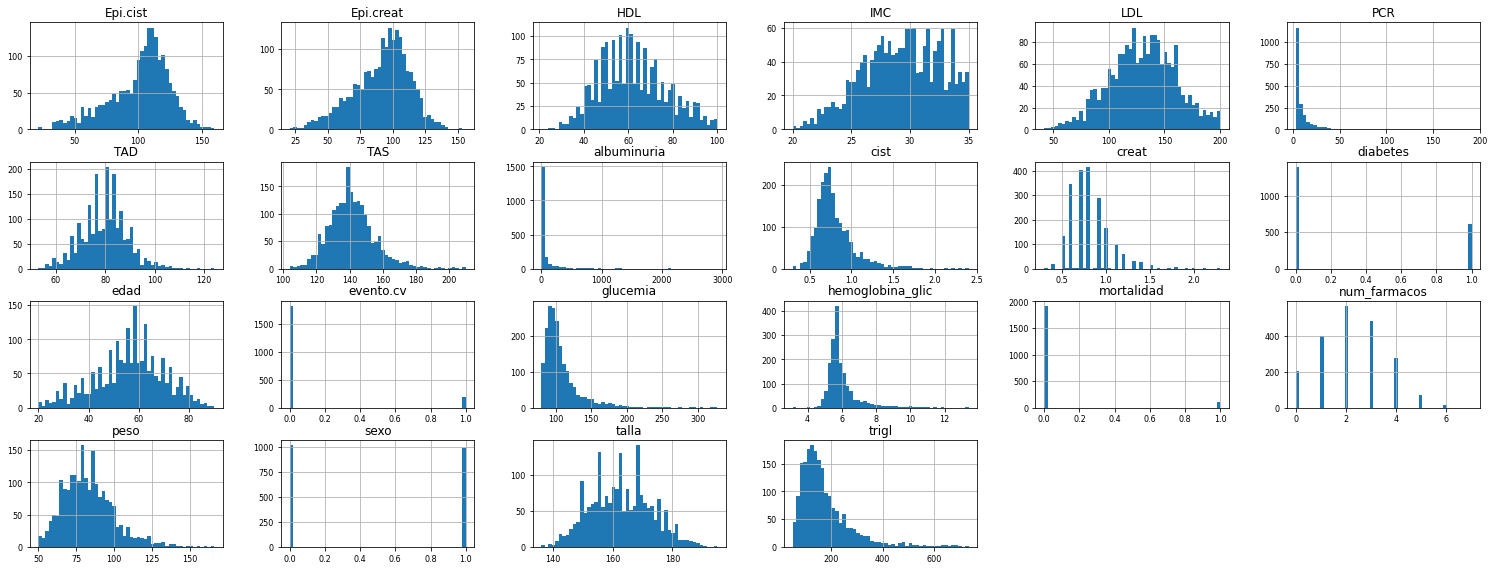

In [20]:
histograms = patient_data.hist(figsize=(26, 25), bins=50, xlabelsize=8, ylabelsize=8,layout = (10,6))

Evitar problema sexo
Evitar problema sexo


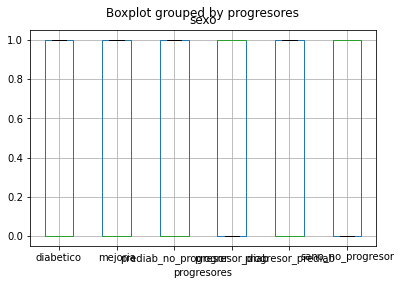

<Figure size 432x288 with 0 Axes>

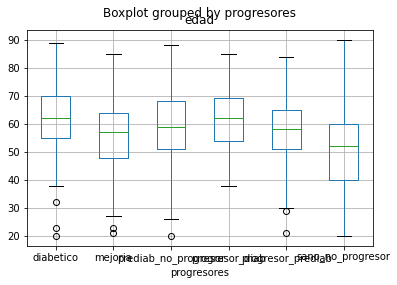

<Figure size 432x288 with 0 Axes>

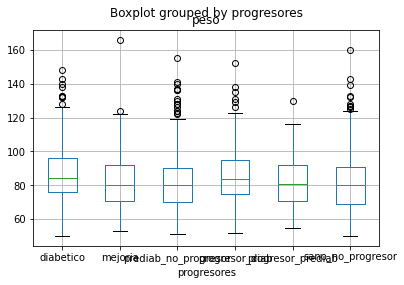

<Figure size 432x288 with 0 Axes>

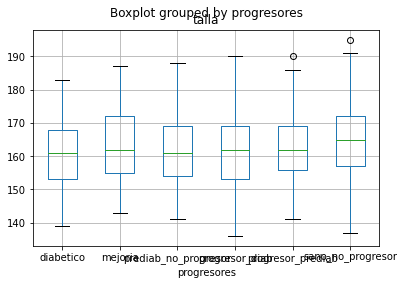

<Figure size 432x288 with 0 Axes>

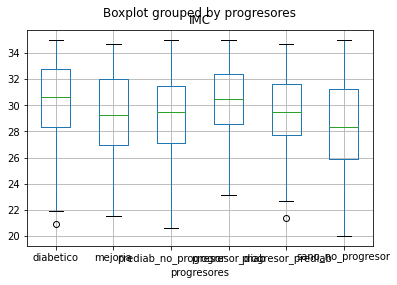

<Figure size 432x288 with 0 Axes>

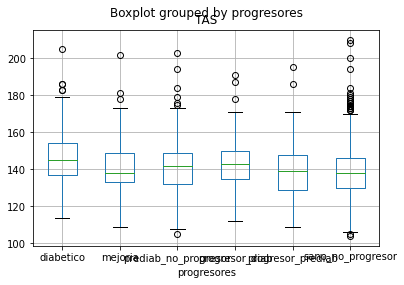

<Figure size 432x288 with 0 Axes>

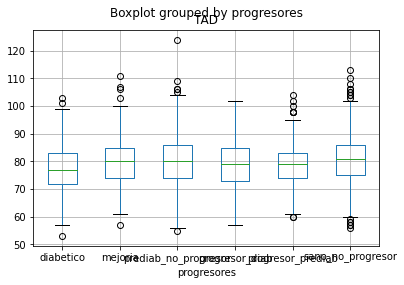

<Figure size 432x288 with 0 Axes>

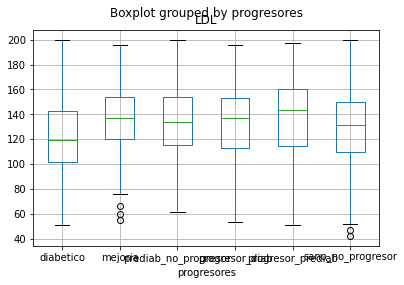

<Figure size 432x288 with 0 Axes>

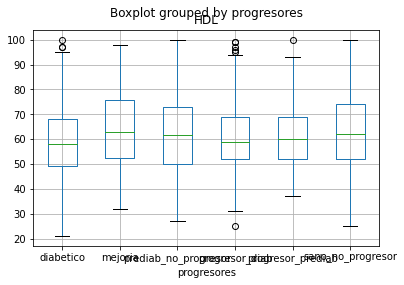

<Figure size 432x288 with 0 Axes>

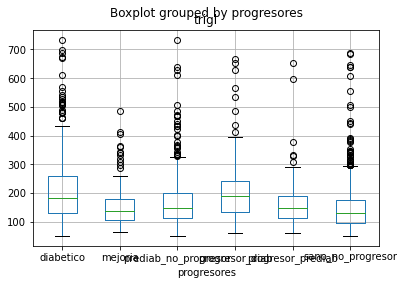

<Figure size 432x288 with 0 Axes>

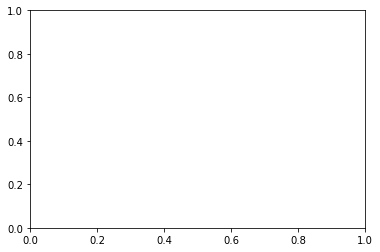

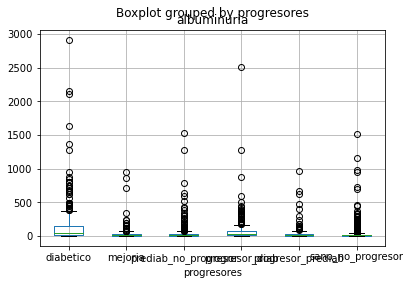

<Figure size 432x288 with 0 Axes>

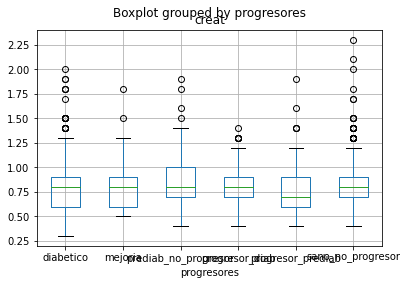

<Figure size 432x288 with 0 Axes>

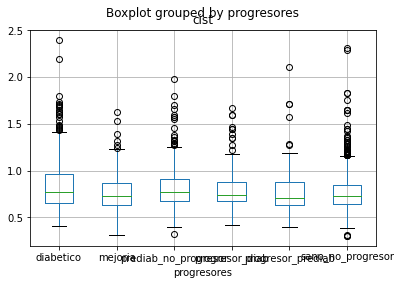

<Figure size 432x288 with 0 Axes>

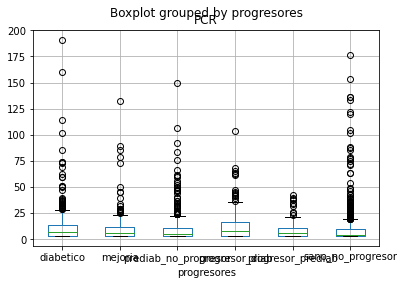

<Figure size 432x288 with 0 Axes>

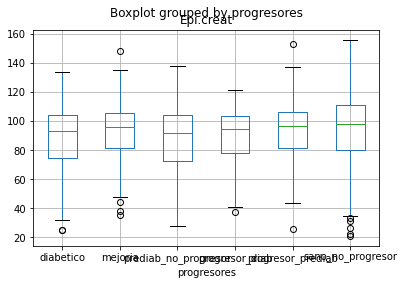

<Figure size 432x288 with 0 Axes>

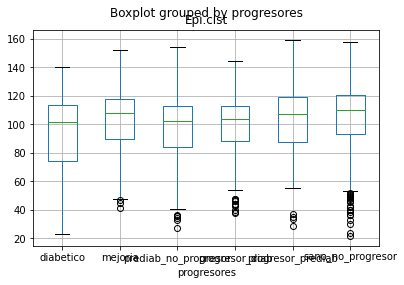

<Figure size 432x288 with 0 Axes>

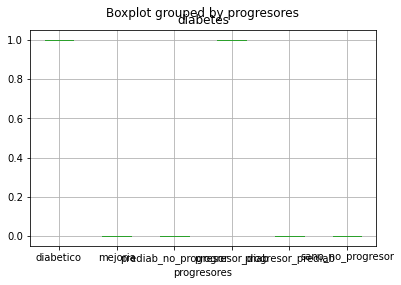

<Figure size 432x288 with 0 Axes>

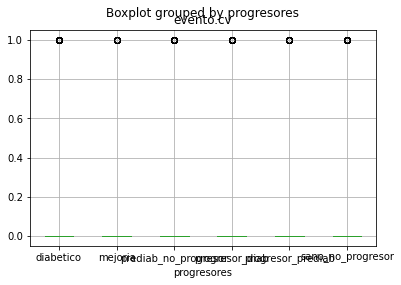

<Figure size 432x288 with 0 Axes>

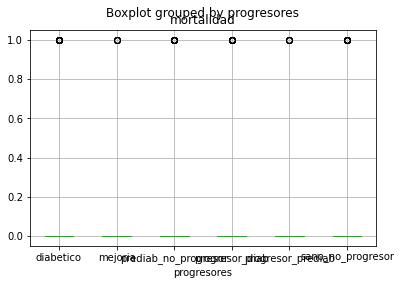

<Figure size 432x288 with 0 Axes>

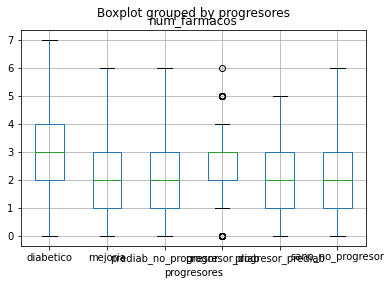

<Figure size 432x288 with 0 Axes>

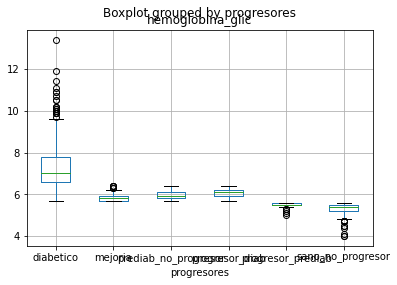

<Figure size 432x288 with 0 Axes>

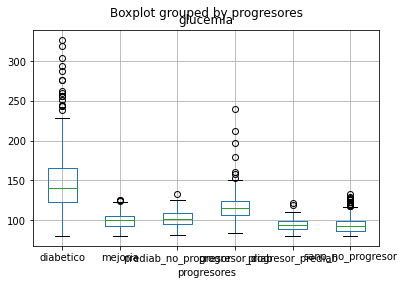

<Figure size 432x288 with 0 Axes>

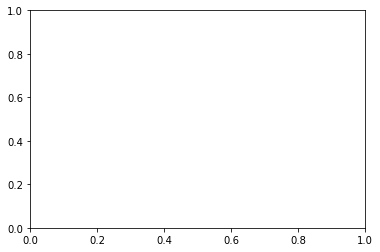

In [21]:
plt.rcParams.update({'figure.max_open_warning': 0})  ##habria que reprrasar los dos errores que da
column_name=list(columns)
for i in column_name:
    try:
        patient_data.boxplot(by='progresores',column =i)
        plt.figure()
    except:
        print('Evitar problema sexo')

## Percentage of each class of 'progresores'

In [22]:
count = patient_data['progresores'].value_counts()
print(count)

sano_no_progresor       758
diabetico               361
prediab_no_progresor    360
progresor_diab          196
mejoria                 157
progresor_prediab       121
Name: progresores, dtype: int64


In [23]:
sum(count)

1953

There must be some empty values because we are not reaching the 2016 total number of patients. The percentages are the following:

In [24]:
for el in count:
    print('The percentages are',(el/1953)*100, '%')

The percentages are 38.81208397337429 %
The percentages are 18.484383000512032 %
The percentages are 18.433179723502306 %
The percentages are 10.03584229390681 %
The percentages are 8.038914490527393 %
The percentages are 6.1955965181771635 %


In [25]:
#print('The percentages is 38.81208397337429 % for sano_no_progresor')
#print('The percentages is 18.484383000512032 % for diabetico')
#print('The percentages is 18.433179723502306 % for prediab_no_progresor')
#print('The percentages is 10.03584229390681 % for progresor_diab')
#print('The percentages is 8.038914490527393 % for mejoria')
#print('The percentages is 6.1955965181771635 % for progresor_prediab')

# Train and Test separation with 7 classes.

In case of the Y, ther appears to be some Nan values that lead to an error when doing the train test separation. For solving the problem, NaN values are replaced with the mosst commmon categorical value. 

In [26]:
patient_data.progresores
print(patient_data.progresores.isnull().sum())

63


In [27]:
patient_data.progresores= patient_data.progresores.fillna('sano_progresor')

In [28]:
print(patient_data.progresores.isnull().sum())

0


In [29]:
from sklearn.model_selection import train_test_split

X = patient_data.drop(['progresores'],axis=1)
Y = patient_data.progresores

X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=4, stratify = patient_data["progresores"])

## Imputation using the median

We will use the median for imputating, first it will be done for the X_train and then for the X_test.

In [30]:
X_train = X_train.fillna(X_train.median()) 


#Comprobación de que se han reemplazado todos correctamente

X_train.isnull().sum()

sexo                0
edad                0
peso                0
talla               0
IMC                 0
TAS                 0
TAD                 0
LDL                 0
HDL                 0
trigl               0
albuminuria         0
creat               0
cist                0
PCR                 0
Epi.creat           0
Epi.cist            0
diabetes            0
evento.cv           0
mortalidad          0
num_farmacos        0
hemoglobina_glic    0
glucemia            0
dtype: int64

In [33]:
X_train.describe()

,sexo,edad,peso,talla,IMC,TAS,TAD,LDL,HDL,trigl,...,cist,PCR,Epi.creat,Epi.cist,diabetes,evento.cv,mortalidad,num_farmacos,hemoglobina_glic,glucemia
count,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,...,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000
mean,0.499380,56.298387,83.436104,162.857940,29.263524,141.266129,79.883995,130.227047,62.125310,175.524814,...,0.804274,11.158418,91.365551,100.564798,0.305831,0.094293,0.052109,2.258685,5.938542,108.717742
std,0.500155,13.460185,16.554924,10.156946,2.942962,13.659757,9.148112,28.799904,14.687785,102.458543,...,0.241449,15.777667,21.857454,24.190798,0.460902,0.292326,0.222316,1.333130,0.864130,28.112156
min,0.000000,20.000000,50.000000,136.000000,20.000000,104.000000,55.000000,42.000000,21.000000,50.000000,...,0.300000,3.000000,20.932130,21.651041,0.000000,0.000000,0.000000,0.000000,3.130000,80.000000
25%,0.000000,48.000000,72.000000,155.000000,27.500000,132.000000,74.000000,111.000000,51.000000,110.000000,...,0.650000,3.450000,77.902766,86.346001,0.000000,0.000000,0.000000,1.000000,5.500000,92.000000
50%,0.000000,57.000000,82.000000,162.000000,29.400000,141.000000,80.000000,131.000000,61.000000,149.000000,...,0.750000,5.655000,94.835852,105.803414,0.000000,0.000000,0.000000,2.000000,5.700000,101.000000
75%,1.000000,65.000000,93.000000,170.000000,31.225000,149.000000,85.000000,150.000000,72.000000,205.250000,...,0.890000,11.400000,106.988453,116.374656,1.000000,0.000000,0.000000,3.000000,6.100000,114.000000
max,1.000000,90.000000,155.000000,191.000000,35.000000,208.000000,124.000000,200.000000,100.000000,734.000000,...,2.400000,160.000000,152.805531,159.477157,1.000000,1.000000,1.000000,7.000000,13.400000,327.000000


In [31]:
X_test = X_test.fillna(X_train.median()) 


#Comprobación de que se han reemplazado todos correctamente

X_test.isnull().sum()



sexo                0
edad                0
peso                0
talla               0
IMC                 0
TAS                 0
TAD                 0
LDL                 0
HDL                 0
trigl               0
albuminuria         0
creat               0
cist                0
PCR                 0
Epi.creat           0
Epi.cist            0
diabetes            0
evento.cv           0
mortalidad          0
num_farmacos        0
hemoglobina_glic    0
glucemia            0
dtype: int64

## Dendogram and correlation between variables.

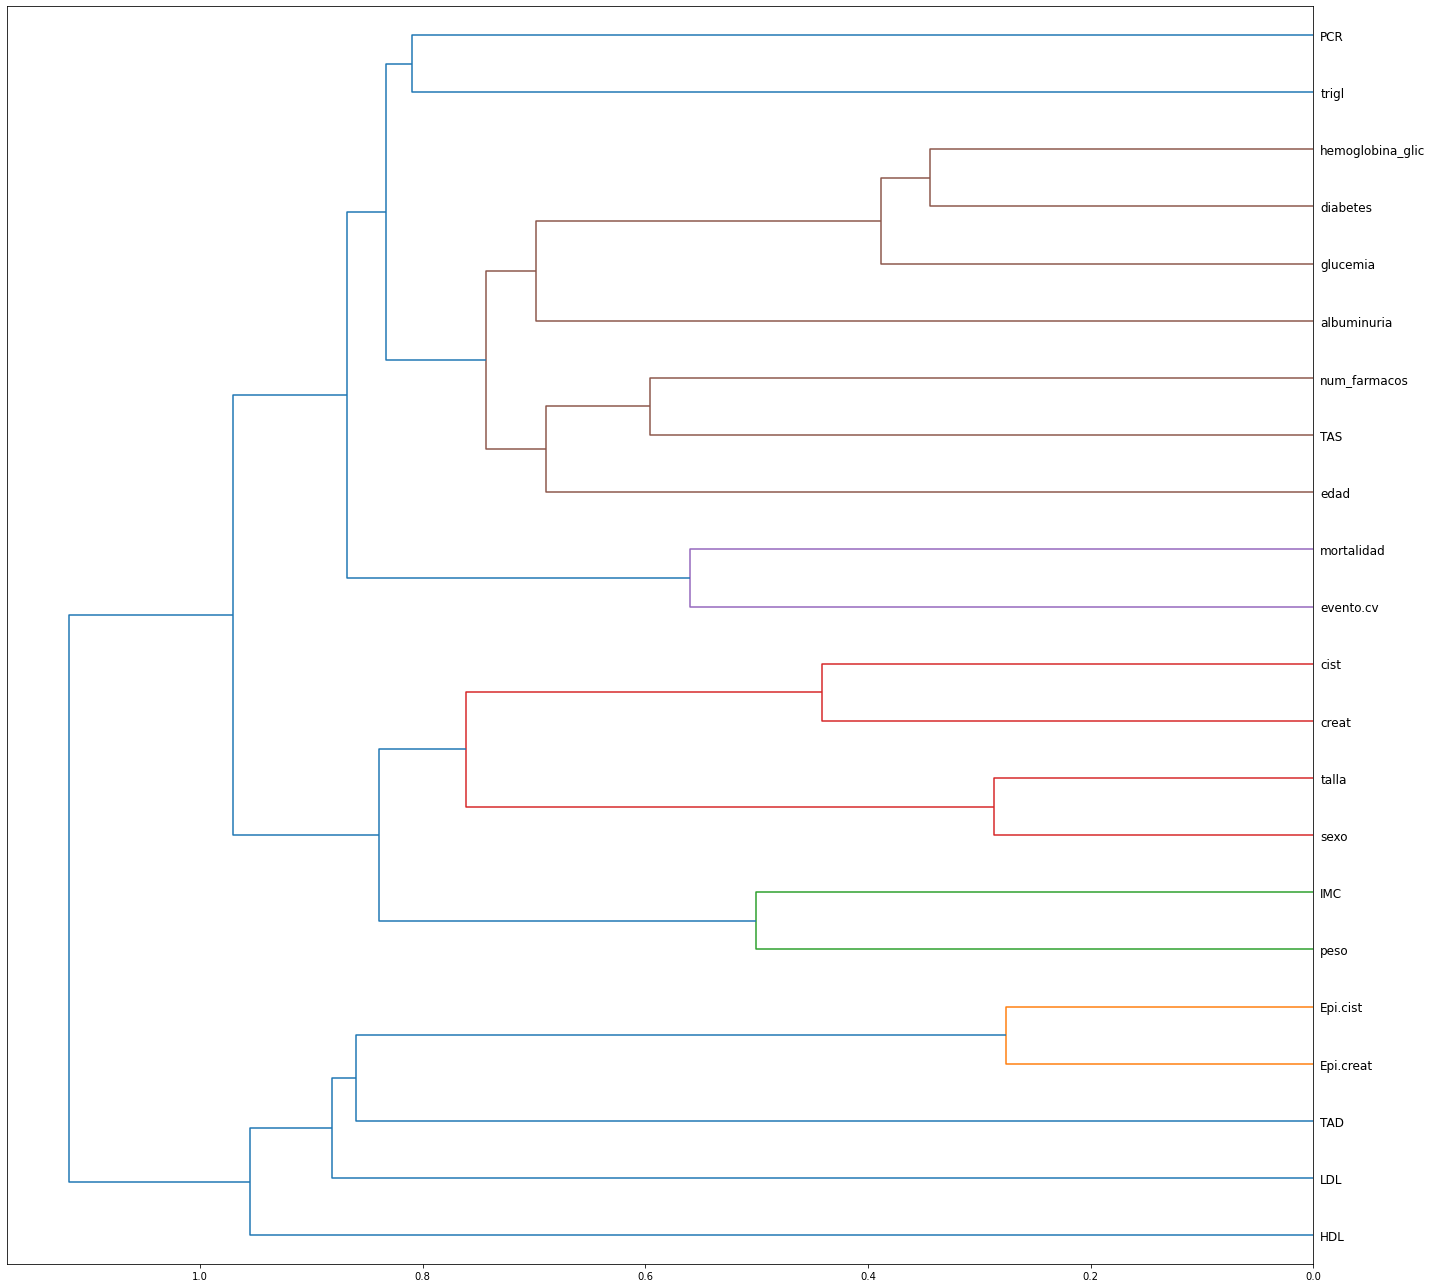

In [34]:
import scipy 
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,18))
dendrogram = hc.dendrogram(z, labels=list(X_train.columns), 
      orientation='left', leaf_font_size=12)
plt.tight_layout()